<a href="https://colab.research.google.com/github/ZainabFadil/Customer-Clustering/blob/main/Customer_Clustering_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Uploading Data


In [8]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Visualizing Data for analysis and preprocessing

Text(0, 0.5, 'Spending Score')

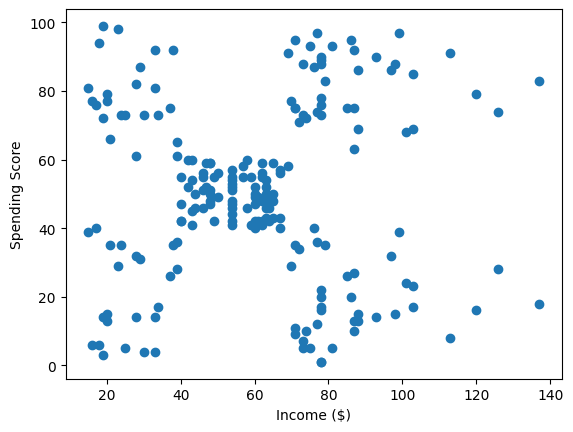

In [12]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Income ($)')
plt.ylabel('Spending Score')

Training the Data


In [19]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [21]:
df['group'] = y_predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


Centroids of the 5 clusters

In [22]:
km.cluster_centers_

array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [87.75      , 17.58333333],
       [55.0875    , 49.7125    ],
       [26.30434783, 20.91304348]])

Text(0, 0.5, 'Spending score')

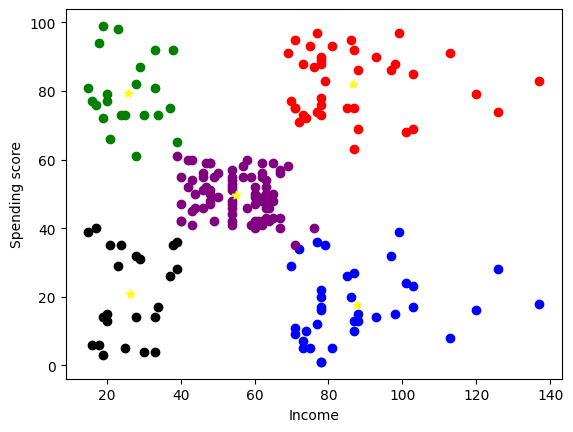

In [41]:
df1 = df[df.group==0]
df2 = df[df.group==1]
df3 = df[df.group==2]
df4 = df[df.group==3]
df5 = df[df.group==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='red')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='green')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='purple')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='yellow', marker='*')
plt.xlabel('Income')
plt.ylabel('Spending score')


In [43]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,1
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,1
4,5,Female,31,0.016393,0.397959,4


In [44]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [45]:
df['group'] = y_predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,4
...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,2
196,197,Female,45,0.909836,0.275510,3
197,198,Male,32,0.909836,0.744898,2
198,199,Male,32,1.000000,0.173469,3


In [46]:
km.cluster_centers_

array([[0.08792846, 0.79962894],
       [0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432]])

Text(0, 0.5, 'Spending score')

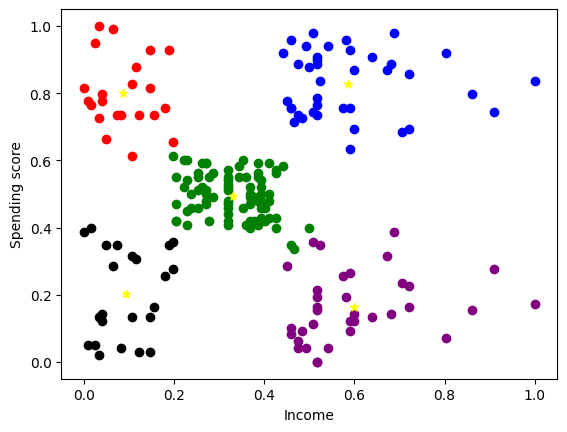

In [47]:
df1 = df[df.group==0]
df2 = df[df.group==1]
df3 = df[df.group==2]
df4 = df[df.group==3]
df5 = df[df.group==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='red')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='green')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='purple')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='yellow', marker='*')
plt.xlabel('Income')
plt.ylabel('Spending score')
